# Normal Distribution
The normal distribution is a probability function that describes how the values of a variable are distributed. It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. Extreme values in both tails of the distribution are similarly unlikely.
#### The Dataset used for this analysis can be found in the repo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
amir_deals = pd.read_csv('amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


#### Creating a histogram with 10 bins to visualize the distribution of the amount.

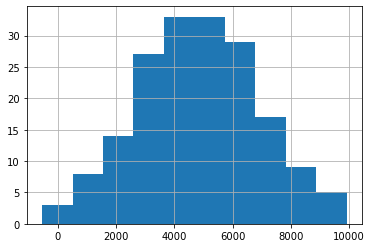

In [4]:
amir_deals['amount'].hist(bins=10)
plt.show()

In [5]:
from scipy.stats import norm

#### Calculating the probability of Amir closing a deal worth less than $7500.

In [6]:
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

0.8943502263331446


#### Calculating the probability of Amir closing a deal worth more than $1000?

In [7]:
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

0.9772498680518208



#### Calculating the probability of Amir closing a deal worth between $3000 and $7000?

In [8]:
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

0.6826894921370859


#### Showing the amount 25% of Amir's sales will be less than?

In [10]:
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

3651.0204996078364


Currently, Amir's average sale amount is $5000. Calculating what his new average amount will be if it increases by 20% and storing this in new_mean.

In [11]:
new_mean = 5000 * 1.2

Amir's current standard deviation is $2000. Calculating what his new standard deviation will be if it increases by 30% and storing this in new_sd.

In [12]:
new_sd = 2000 * 1.3

#### Creating a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.

In [13]:
new_sales = norm.rvs(new_mean, new_sd, size=36)

#### Plotting the distribution of the new_sales amounts using a histogram.

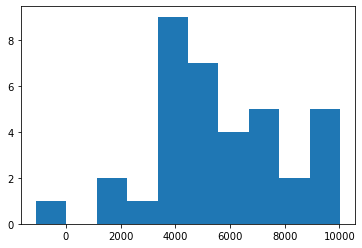

In [14]:
plt.hist(new_sales)
plt.show()

#### Creating a histogram of the num_users column of amir_deals.



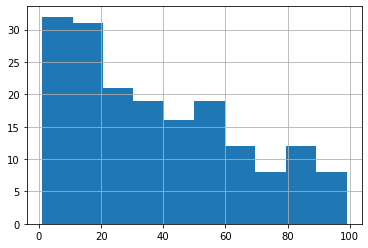

In [15]:
amir_deals['num_users'].hist()
plt.show()

#### Setting the seed to 104.

In [16]:
np.random.seed(104)

#### Taking a sample of size 20 with replacement from the num_users column of amir_deals, and taking the mean.

In [18]:
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)
sample_means = []

#### Repeating this 100 times using a for loop and storing as sample_means. This will take 100 different samples and calculate the mean of each.

In [19]:
for i in range(100):
    samp_20 = amir_deals['num_users'].sample(20, replace=True)
    samp_20_mean = np.mean(samp_20)
    sample_means.append(samp_20_mean)
print(sample_means)

[45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1, 38.6]


#### Converting sample_means into a pd.Series and creating a histogram of the sample_means.

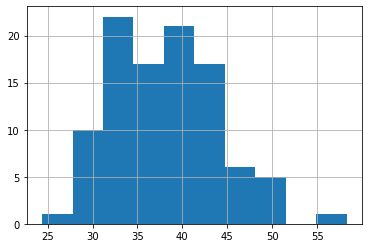

In [20]:
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.show()

In [21]:
from scipy.stats import poisson

#### Calculating the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

In [22]:
prob_5 = poisson.pmf(5, 4)
print(prob_5)

0.1562934518505317


#### Amir's coworker responds to an average of 5.5 leads per day. Calculating the probability that she answers 5 leads in a day.

In [23]:
prob_coworker = poisson.pmf(5, 5.5)
print(prob_coworker)

0.17140068409793663


#### Calculating the probability that Amir responds to 2 or fewer leads in a day.

In [24]:
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

0.23810330555354436


#### Calculating the probability that Amir responds to more than 10 leads in a day.

In [25]:
prob_over_10 = 1 - poisson.cdf(10, 4)
print(prob_over_10)

0.0028397661205137315


In [26]:
from scipy.stats import expon

#### Calculating the probability time it takes Amir to respond to a lead in less than one hour

In [27]:
print(expon.cdf(1, scale=2.5))

0.3296799539643607


#### Calculating the probability time it takes Amir to respond to a lead in more than 4 hours.

In [28]:
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


#### Calculating the probability time it takes Amir to respond to a lead in 3-4 hours.

In [29]:
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684
